<Body>   
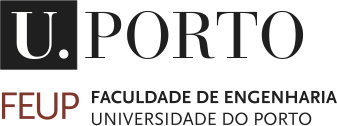   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**Professors:**

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**M. Rosário Pinho** (mrpinho@fe.up.pt)

FEUP, Feb. 2024

---


# **Project - Part 1**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions. At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **April 1st** in your corresponding practical class. Send the files until 23:59 of **May 31, 2024**.


---



# **Project of Control and Optimization (Part I and Part II)**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions (note that you should include your computations in a picture format or in latex). At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **May 20** in your corresponding practical class. Send the files until 23:59 of **May 31, 2024**.


---



In [173]:
# To make a nice pdf file of this file, you have to do the following:
# - upload your file to print into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "name_of_the_file.ipynb"
# Then just download the html file and print it to pdf!

[NbConvertApp] WARNING | pattern 'name_of_the_file.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut

In [174]:
#!pip install control

# **Identification**

* **Group:** 07
* **Name:** Bruno Filipe Torres Costa
* **Student Number:** 202004966

* **Name:** André Silva Martins
* **Student Number:** 202006053

* **Name:** Rúben Barbosa Lopes
* **Student Number:** 202005107

---



# An Autonomous Underwtare Vehicle (UAV) model in the vertical plan


<Body>   
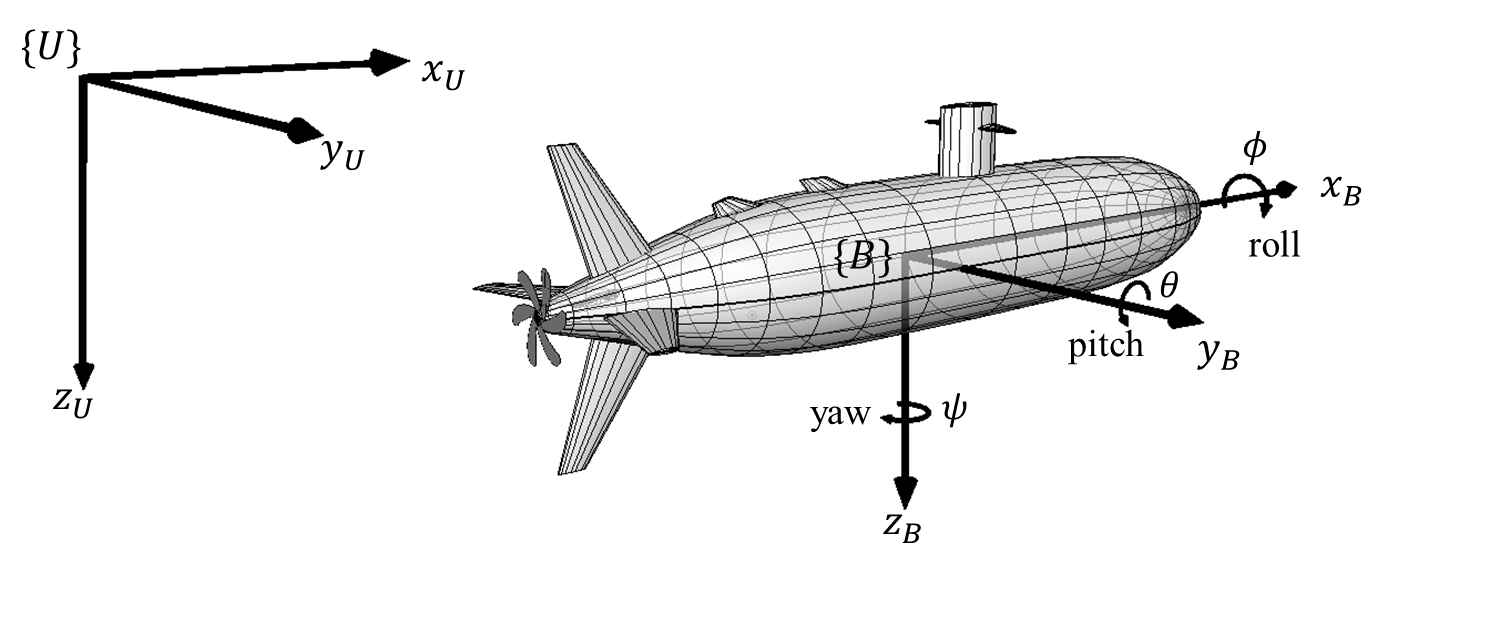

Fig. 1. Coordinate frames, position and orientation variables of an AUV.


Consider an Autonomous Underwater Vehicle (AUV) illustrated in Fig. 1 that can only generate force in $x_B$-direction by means of an actuator composed of an electric motor with a propeller coupled to the shaft.

In this work, the final goal is to design a tracking controller in the vertical plane so that that the vehicle will move according to a desired depth trajectory.


In the vertical plane, the kinematic equations take the form

\begin{align}
 \dot x &= u\cos \theta  + w\sin \theta  \\
 \dot z &=  - u\sin \theta  + w\cos \theta  \\
 \dot \theta  &= q
\end{align}

where $u$, $w$ and $q$ are the linear and angular velocities of the  vehicle, respectively, in surge ($x_B$), heave ($z_B$) and pitch ($\theta$) direction of the body-fixed coordinates $\{B\}$. The Cartesian coordinates of the vehicle's center of mass is denoted by $x$ and $z$, and $\theta$ is the pitch angle.

The simplified equations of motion for surge, heave, and pitch rate when there is no actuated force in $Z_B$ direction (that is, the vehicle is underactuated) yield

\begin{align}
{m_u}\dot u + {m_w}wq + {d_u}(u)u &= \tau_u \\
{m_w}\dot w - {m_u}uq + {d_w}(w)w &= 0 \\
{m_q}\dot q + {m_{uw}}uw + {d_q}(q)q - z_BB\sin\theta &= \tau_q
\end{align}

where $m_u=m-X_{\dot{u}}$, $m_w=m-Z_{\dot{w}}$, $m_q=I_y-M_{\dot q}$ and $m_{uw}=m_u-m_w$ are mass and hydrodynamic added mass terms, $B$ denotes the buoyancy, and the hydrodynamic damping effects are considered to be of the form

\begin{align}
d_u(u) &=-X_u-X_{u|u|}|u| \\
d_w(w) &=-Z_w-Z_{w|w|}|w| \\
d_q(q) &=-M_q-M_{q|q|}|q|
\end{align}


In the above equations, it is assumed that the AUV is neutrally buoyant and that the center of buoyancy can be expressed as $(x_B, y_B, z_B) = (0,0, z_B)$, where $z_B$ is the metacentric height.
The symbols $\tau_u$ and $\tau_q$ denote the actuated force in surge direction and  torque around the $y$-axis of the vehicle, respectively.



# **Part 1: Stability analysis**



We take the practical situation that there exist autopilots controllers in charge of tracking reference signals in $u$ and $q$. Thus, we consider at this stage that the actuation signals are $u$ and $q$.

**1.1** Show that the speed controller given by

\begin{equation}
u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}
\end{equation}

forces the AUV to move with a constant horizontal velocity $v_d$, that is, $\dot x = v_d$. Show also that in this case the equations of motion in the vertical plane of the AUV  reduces to

$\color{blue}{AUV\ model}$

\begin{align*}
\dot x &= v_d \\
\dot z &= - v_d \tan\theta + \frac{1}{\cos\theta}w \\
\dot w &=d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
\dot\theta &= q
\end{align*}

where $z$ is the vertical position (depth) of the AUV, $w$ is the linear velocity along the axis $z_B$ (*heave*), $\theta$ is the angle of *pitch*, and $q$ is the angular velocity around the axis $y_B$.


**1.1 Solution**

$$
u = \frac{v_d-ω\sin(θ)}{cos(θ)} ⟺ ẋ = ucos(θ)+ωsin(θ)
$$

$$
ẋ = (\frac{v_d-ωsin(θ)}{cos(θ)})cos(θ)+ωsin(θ) = v_d-ωsin(θ)+ωsin(θ)
$$

$$
⟺ ẋ = v_d
$$

$$
ż = -usin(θ)+ωcos(θ) = -\frac{(v_d-ωsin(θ))}{cos(θ)}sin(θ)+ωcos(θ)
$$

$$
= (-v_d+ωsin(θ))tan(θ)+ωcos(θ) = -v_dtan(θ)+ωsin(θ)tan(θ) + ωcos(θ)
$$

$$
= -v_dtan(θ)+ω(\frac{sin^2(θ)}{cos(θ)}+cos(θ)) = -v_dtan(θ)+ω(\frac{cos^2(θ)+sin^2(θ)}{cos(θ)})
$$

$$
⟺ ż = -v_dtan(θ)+\frac{1}{cos(θ)}ω
$$

$$
m_ωω̇ - m_uuq+d_ω(ω)ω = 0
$$

$$
⟺ ω̇ = \frac{m_ω}{m_ω}(\frac{v_d}{cos(θ)}-ωtan(θ))-\frac{1}{m_ω}(-Z_ω-Z_{w|w|}|w|)ω
$$

$$
= m̃(\frac{v_d}{cos(θ)}-ωtan(θ))+\frac{Z_ω}{m_ω}ω+\frac{Z_{w|w|}}{m_ω}|ω|ω
$$

$$
⟺ ω̇ = d_1ω+d_2ω|ω|+m̃(\frac{v_d}{cos(θ)}-ωtan(θ))
$$

In the sequel, we will consider that system parameters have the following values (in appropriate units):
$v_d = 1$; $d_1= -3$; $d_2 = -12$, $\bar m = 0.9$

**1.2.**
Let $z_d$ be a given desired depth. Defining the state ${\bf x} = (z-z_d,w,\theta)^⊤$, input ${\bf u}=q$, output ${\bf y}=z-z_d$, write the system in state-space form and linearize it around the origin ${\bf x=0}$.

**1.2 Solution**

Showing that ${\bf x=0}$ is an equilibrium point

$$
X = (z - zd, ω, θ)^T = (0, 0, 0)^T
$$

$$
Ẋ = \begin{cases}
z̃̇ = -v_dtan(θ) + \frac{ω}{cos(θ)} \\
ω̇ = d_1ω + d_2ω|ω| + m̃(\frac{v_d}{cos(θ)} - ωtan(θ))q \\
θ̇ = q \\
\end{cases}
= \begin{cases}
z̃̇ = 0 \\
ω̇ = 0\\
θ̇ = 0\\
\end{cases}
$$

Linearization around ${\bf x=0}$

$$
X = (z - zd, ω, θ)^T
$$

\begin{cases}
x_1 = z̃\\
x_2 = ω \\
x_3 = θ \\
\end{cases}

$$
Ẋ = \begin{cases}
z̃̇ = -v_dtan(θ) + \frac{ω}{cos(θ)} \\
ω̇ = d_1ω + d_2ω|ω| + m̃(\frac{v_d}{cos(θ)} - ωtan(θ))q \\
θ̇ = q \\
\end{cases}
$$


\begin{cases}
\dot x_1 = -v_dtan(x_3) + x_2/cos(x_3) = f_1 \\
\dot x_2 = d_1x_2 + d2x_2|x_2| + m̃(v_d/cos(x_3) - x_2tan(x_3))q = f_2 \\
\dot x_3 = q = f_3 \\
\end{cases}

$$
Y = \begin{bmatrix}
1 & 0 & 0 \\
\end{bmatrix}.\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
$$


$$ A =
\begin{bmatrix}
\frac{df_1}{dx_1} & \frac{df_1}{dx_2} & \frac{df_1}{dx_3} \\
\frac{df_2}{dx_1} & \frac{df_2}{dx_2} & \frac{df_2}{dx_3} \\
\frac{df_3}{dx_1} & \frac{df_3}{dx_2} & \frac{df_3}{dx_3} \\
\end{bmatrix}
=
\begin{bmatrix}
0 & \frac{1}{cos(x_3)} & -\frac{v_d}{cos^2(x_3)} + x_2\frac{sin(x_3)}{cos^2(x_3)} \\
0 & d_1 + 2d_2x_2 - \tilde mqtan(x_3) & \frac{\tilde mv_dsin(x_3)}{cos^2(x_3)} - \frac{x_2q}{cos^2(x_3)} \\
0 & 0 & 0 \\
\end{bmatrix}, X = 0
$$

$$=
\begin{bmatrix}
0 & 1 & -v_d\\
0 & d_1 & 0\\
0 & 0 & 0\\
\end{bmatrix}
$$


$$B =
\begin{bmatrix}
\frac{df_1}{dq}\\
\frac{df_2}{dq}\\
\frac{df_3}{dq}\\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
\tilde m(\frac{v_d}{cos(x_3)} - x_2tan(x_3)) \\
1 \\
\end{bmatrix}, X = 0
$$

$$=
\begin{bmatrix}
0 \\
\tilde mv_d \\
1 \\
\end{bmatrix}
$$

In [175]:
# Confirmation with Code

# System Linearization
import sympy as sp

# Define symbols
x1, x2, x3 = sp.symbols('x1 x2 x3')
vd, d1, d2, m, q = sp.symbols('v_d d_1 d_2 m q')

# Define state vector and input
x = sp.Matrix([x1, x2, x3])
u = sp.Matrix([q])

# Define system equations
f = sp.Matrix([-vd * sp.tan(x3) + 1/sp.cos(x3) * x2,
               d1 * x2 + d2 * x2 * x2 + m * (vd/sp.cos(x3) - x2 * sp.tan(x3)) * q,
               q])

# Define output equation
g = sp.Matrix([x1])

# Compute Jacobians
A = f.jacobian(x)
B = f.jacobian(u)
C = g.jacobian(x)

# Substitute X = 0
A = f.jacobian(x).subs({x1: 0, x2: 0, x3: 0})
B = f.jacobian(u).subs({x1: 0, x2: 0, x3: 0})
C = g.jacobian(x).subs({x1: 0, x2: 0, x3: 0})

# Print the Jacobians
print("A:")
sp.pprint(A)
print("\nB:")
sp.pprint(B)
print("\nC:")
sp.pprint(C)

A:
⎡0  1   -v_d⎤
⎢           ⎥
⎢0  d₁   0  ⎥
⎢           ⎥
⎣0  0    0  ⎦

B:
⎡  0  ⎤
⎢     ⎥
⎢m⋅v_d⎥
⎢     ⎥
⎣  1  ⎦

C:
[1  0  0]


**1.3 Solution**

Since matrix A is triangular, the eigenvalues are the values that form the diagonal:

$$ A = \begin{bmatrix}
0 & 1 & -v_d \\
0 & d_1 & 0 \\
0 & 0 & 0 \\
\end{bmatrix} $$

The eigenvalues of matrix \( A \) are:
$$\lambda_1 = 0 $$
$$\lambda_2 = d_1 = -3 $$
$$\lambda_3 = 0 $$

Once we have eigenvalues located in the imaginary axis we cannot conclude about the nonlinear system stability

**1.3.**
Analyze the stability of the origin ${\bf x = 0}$ with ${\bf u=0}$ of the linear and nonlinear system using the **Lyapunov indirect method**.

In [176]:
# Confirmation with code

# Lypaunov indirect method
import numpy as np


# Constants
vd = 1
d1 = -3
d2 = -12
m = 0.9
k1 = 1
k2 = 1
zd = 1

# Matrix A
A = np.array([[0.0, 1.0, -vd],
              [0.0, d1, 0.0],
              [0.0, 0.0, 0.0]])

# Matrix B
B = np.array([[0.0],
              [m*vd],
              [1.0]])

# Matrix C
C = np.array([1.0, 0.0, 0.0])

print('---Stability---')
# Eigenvalues of A
eigenvalues = np.linalg.eigvals(A)
print('Eigenvalues of A:', eigenvalues)

# Check if eigenvalues are all negative
if all(eigenvalue < 0 for eigenvalue in eigenvalues):
    print("Stable")
elif any(eigenvalue == 0 for eigenvalue in eigenvalues):
    print("On imaginary axis (cannot conclude stability of the nonlinear system)")
else:
    print("Unstable")

---Stability---
Eigenvalues of A: [ 0. -3.  0.]
On imaginary axis (cannot conclude stability of the nonlinear system)


**1.4**
For $z_d = 1\,m$, plot the **time-evolution** of the state for the nonlinear and linear systems (with $q=0$) for different initial conditions.

Use the numerical integrator `integrate.odeint` of `scipy`.

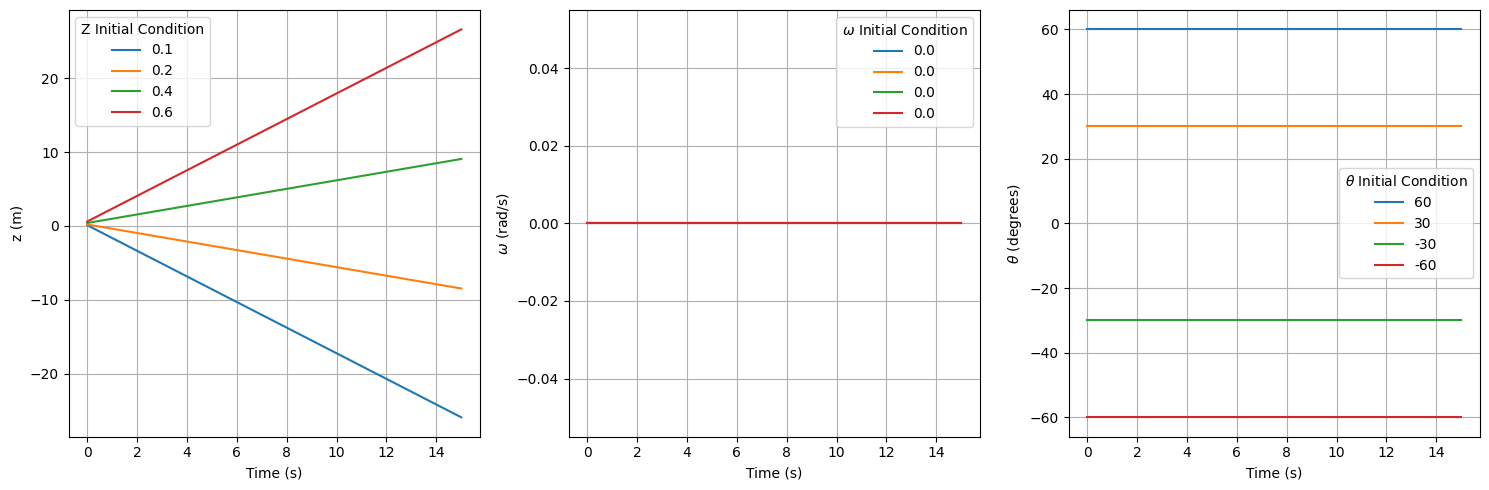

In [177]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Nonlinear System
def Sys_f(x, t=0):
    z = x[0]
    w = x[1]
    th = x[2]
    q = 0
    dx1 = -vd*np.tan(th) + w/np.cos(th)
    dx2 = d1*w + d2*w*np.abs(w) + q*m*(vd/np.cos(th) - w*np.tan(th))
    dx3 = q
    return np.array([dx1, dx2, dx3])

# Generate 1000 linearly spaced points for t
t_end = 15
t = np.linspace(0, t_end, 1000)


# Different initial conditions to test
initial_conditions = [
    np.array([0.1, 0.0, np.pi/3]),
    np.array([0.2, 0.0, np.pi/6]),
    np.array([0.4, 0.0, -np.pi/6]),
    np.array([0.6, 0.0, -np.pi/3]),
    # Add more initial conditions as needed
]

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate([r'z (m)', r'$\omega$ (rad/s)', r'$\theta$ (degrees)']):
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel(var)
    axs[i].grid(True)

    for x0 in initial_conditions:
        x_nl, infodict = integrate.odeint(Sys_f, x0, t, full_output=True)
        if var == r'$\theta$ (degrees)':
            axs[i].plot(t, x_nl[:, i]*180/np.pi, label=f'{round(x0[i]*180/np.pi)}')
        else :
            axs[i].plot(t, x_nl[:, i], label=f'{x0[i]}')

axs[0].legend(loc='best', title=r'Z Initial Condition')
axs[1].legend(loc='best', title=r'$\omega$ Initial Condition')
axs[2].legend(loc='best', title=r'$\theta$ Initial Condition')
plt.tight_layout()
plt.show()

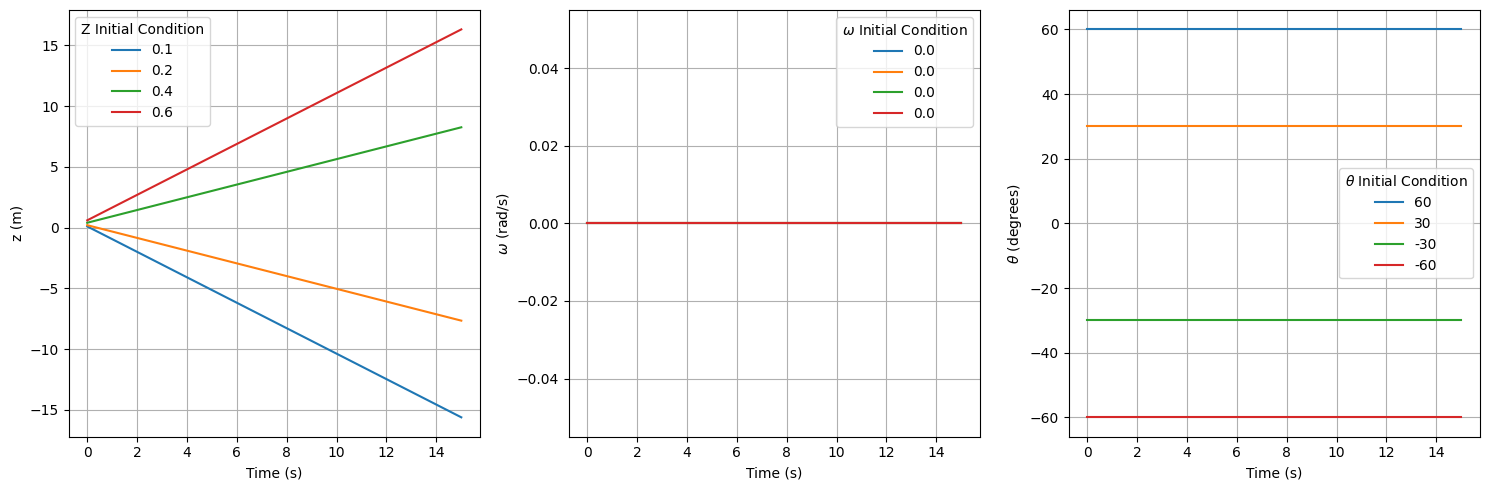

In [178]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


# Linear System
def Sys_f_Linear(x, t=0):
  z = x[0]
  w = x[1]
  th = x[2]
  q = 0
  dx1 = w - vd*th
  dx2 = d1*w + m*vd*q
  dx3 = q
  return np.array([ dx1, dx2, dx3
                   ])

# Generate 1000 linearly spaced points for t
t_end = 15
t = np.linspace(0, t_end, 1000)


# Different initial conditions to test
initial_conditions = [
    np.array([0.1, 0.0, np.pi/3]),
    np.array([0.2, 0.0, np.pi/6]),
    np.array([0.4, 0.0, -np.pi/6]),
    np.array([0.6, 0.0, -np.pi/3]),
    # Add more initial conditions as needed
]

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate([r'z (m)', r'$\omega$ (rad/s)', r'$\theta$ (degrees)']):
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel(var)
    axs[i].grid(True)

    for x0 in initial_conditions:
        x_l, infodict = integrate.odeint(Sys_f_Linear, x0, t, full_output=True)
        if var == r'$\theta$ (degrees)':
            axs[i].plot(t, x_l[:, i]*180/np.pi, label=f'{round(x0[i]*180/np.pi)}')
        else :
            axs[i].plot(t, x_l[:, i], label=f'{x0[i]}')

axs[0].legend(loc='best', title=r'Z Initial Condition')
axs[1].legend(loc='best', title=r'$\omega$ Initial Condition')
axs[2].legend(loc='best', title=r'$\theta$ Initial Condition')
plt.tight_layout()
plt.show()

**Nonlinear System vs Linear System**

From both simulations plotted above we can see specially in the z that the linear system only aproximates well the Nonlinear system when close to the origin.

**1.5**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, $q$ as input and assume that $w=0$.

Prove that the origin of the closed-loop system with control law
\begin{equation}
q = k_1 (z-z_d) - k_2 \theta \tag{1}
\end{equation}
with positive gains $k_1$ and $k_2$ (and $v_d>0$) is asymptotically stable. 
Use the Lyapunov function
\begin{equation}
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi
\end{equation}


**1.5 Solution**

$$
V(z̃, θ) = \frac{k_1z̃^2}{2v_d} + \int_{0}^{θ} tan(ϕ) \, dϕ =
\frac{k_1z̃^2}{2v_d} + [ln|\frac{1}{cos(θ)}|]\begin{vmatrix}
θ \\
0 \\
\end{vmatrix} =
\frac{k_1z̃^2}{2v_d} + ln|\frac{1}{cos(θ)}| - ln|1| =
\frac{k_1z̃^2}{2v_d} (>0) + ln|\frac{1}{cos(θ)}| (>0) 
→ (>0) → positive \space definite
$$
V(z̃, θ) is positive definite.

$$
V̇(z̃, θ) = \frac{dV}{dz}Z̃̇ + \frac{dV}{dθ}θ̇ =
\frac{2k_1z̃z̃̇}{2v_d} + tan(θ)θ̇ =
-k_1z̃tan(θ) + tan(θ)q =
-k_1\tilde ztan(θ) + tan(θ)(k_1z̃ - k_2θ) =
-k_2θtan(θ) → (\leq0) → semi \space negative
$$
V̇(z̃, θ) is semi negative.



La Salle's Theorem
$$
E = \{ x \in \mathbb{R^2}: V̇(z̃, θ) = 0\} ⇔ \{ x \in \mathbb{R^2}: θ = 0\}
$$
$θ = 0; \dot θ = 0$

$$
θ̇ = q ⇔ θ̇ = k_1z̃ - k_2θ ⇔ z̃ = 0
$$

M ⊂ E
$$
M = \{ x \in \mathbb{R^2}: x = 0\}
$$

${\bf x=0}$ is A.S  $$\frac{-π}{2} < θ < \frac{π}{2}$$


**1.6**
For the above item, confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions with $k_1=k_2=1$.

In [179]:
import control

# Matrix A
A1 = np.array([[0.0, -vd],
              [0.0, 0.0]])

# Matrix B
B1 = np.array([[0.0],
              [1.0]])

# Controllability
print ('---Controllability---')
print ('rank of ctrb(A,b):' , np.linalg.matrix_rank( control.ctrb( A1, B1 ) ))
print ('Eigenvalues of A:', np.linalg.eig( A1 )[0])


# Pole Placement
K = control.place( A1, B1, [-1, -2] )
K = np.array([ [-k1], [k2]]).T
print ('\n---Pole Placement\nK=:', K)

# Verification of Eigen values of A-BK
print ('\n---Verification of Eigenvalues of A-BK---')
Acl = A1 - B1 @ K
#print(Acl)
eig_Acl, eig_vect = np.linalg.eig( Acl )
print ('Eigenvalues of A-BK:', eig_Acl)

---Controllability---
rank of ctrb(A,b): 2
Eigenvalues of A: [0. 0.]

---Pole Placement
K=: [[-1  1]]

---Verification of Eigenvalues of A-BK---
Eigenvalues of A-BK: [-0.5+0.8660254j -0.5-0.8660254j]


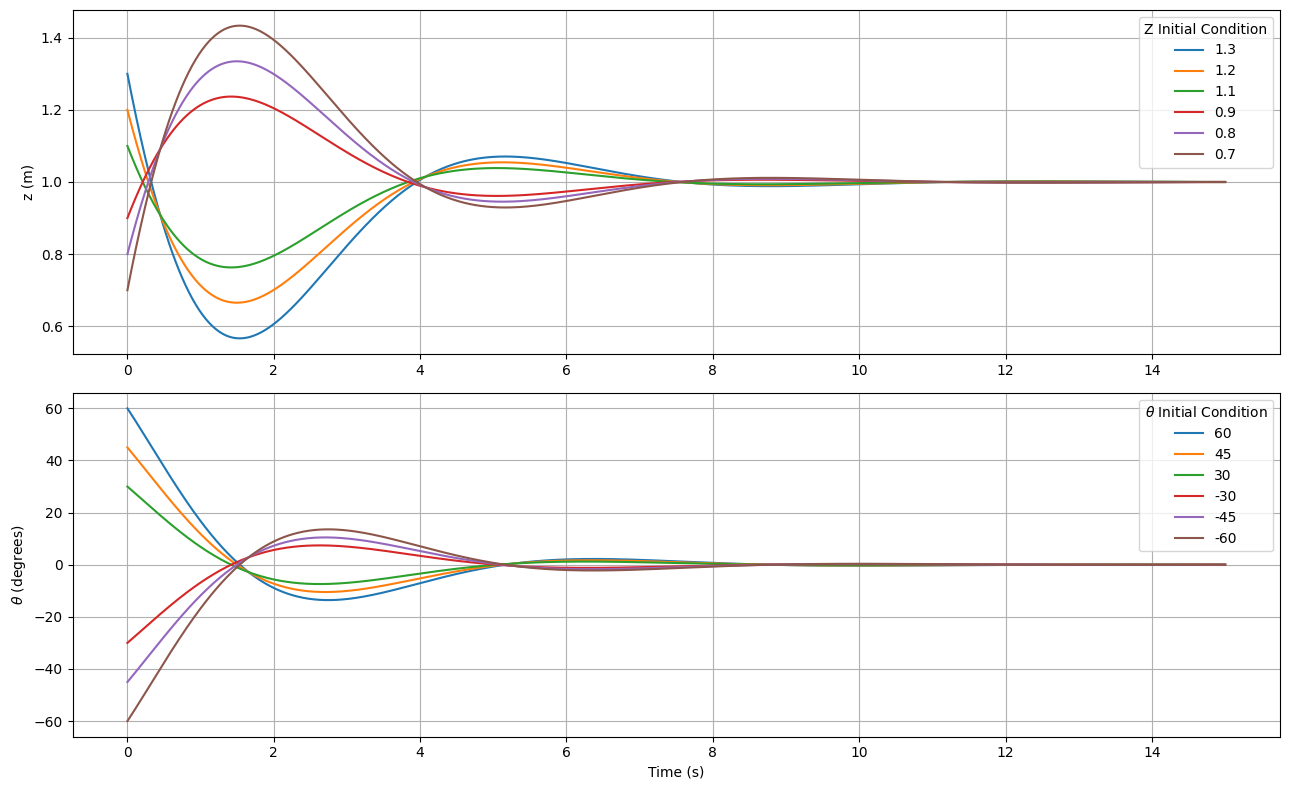

In [180]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Linear System
def Sys_f_Linear(x, t=0):
    z = x[0]
    th = x[1]
    q = k1*(z-zd) - k2*th
    return np.array([-vd*th, q])

# Generate 1000 linearly spaced points for t
t_end = 15
t = np.linspace(0, t_end, 1000)


# Different initial conditions to test
initial_conditions = [
    np.array([1.3, np.pi/3]),
    np.array([1.2, np.pi/4]),
    np.array([1.1, np.pi/6]),
    np.array([0.9, -np.pi/6]),
    np.array([0.8, -np.pi/4]),
    np.array([0.7, -np.pi/3]),
    # Add more initial conditions as needed
]

# Plot
fig, axs = plt.subplots(2, 1, figsize=(13, 8))

for x0 in initial_conditions:
    x, infodict = integrate.odeint(Sys_f_Linear, x0, t, full_output=True)
    
    axs[0].plot(t, x[:, 0], label=f'{x0[0]}')
    axs[0].set_ylabel(r'z (m)')
    axs[0].grid(True)
    axs[0].legend()

    axs[1].plot(t, x[:, 1]*180/np.pi, label=f'{round(x0[1]*180/np.pi)}')
    axs[1].set_ylabel(r'$\theta$ (degrees)')
    axs[1].grid(True)
    axs[1].legend()


axs[0].legend(loc='best', title=r'Z Initial Condition')
axs[1].legend(loc='best', title=r'$\theta$ Initial Condition')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

**1.7**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the control law (1).
Plot the **time-evolution** of the state  for different initial conditions.

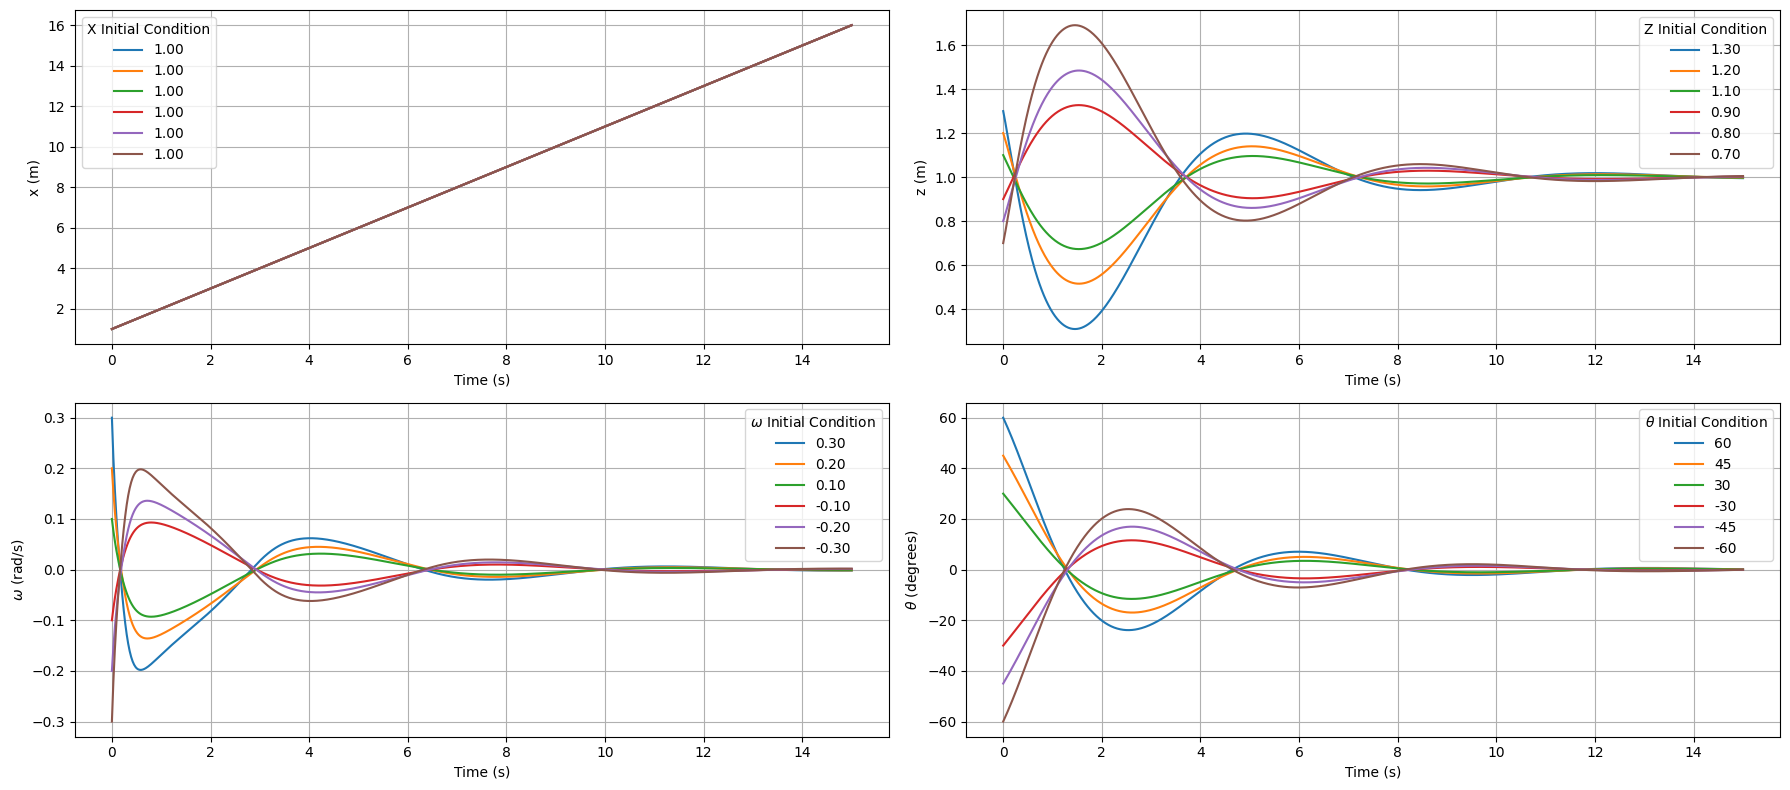

In [181]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Constants
vd = 1
d1 = -3
d2 = -12
m = 0.9
k1 = 1
k2 = 1
zd = 1

# Nonlinear System
def Sys_f(x, t=0):
  z = x[1]
  w = x[2]
  th = x[3]
  q = k1*(z-zd) - k2*th
  dx1 = vd
  dx2 = -vd*np.tan(th) + w/np.cos(th)
  dx3 = d1*w + d2*w*np.abs(w) + m*(vd/np.cos(th) - w*np.tan(th))*q
  dx4 = q
  return np.array([ dx1, dx2, dx3, dx4
                   ])

# Generate 1000 linearly spaced points for t
t_end = 15
t = np.linspace(0, t_end, 1000)

# Initial conditions
initial_conditions = [
    np.array([vd, 1.3, 0.3, np.pi/3]),
    np.array([vd, 1.2, 0.2, np.pi/4]),
    np.array([vd, 1.1, 0.1, np.pi/6]),
    np.array([vd, 0.9, -0.1, -np.pi/6]),
    np.array([vd, 0.8, -0.2, -np.pi/4]),
    np.array([vd, 0.7, -0.3, -np.pi/3]),
    # Add more initial conditions as needed
]

# Integrate the system and plot
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

for x0 in initial_conditions:
    x = integrate.odeint(Sys_f, x0, t, full_output=False)
    axs[0, 0].plot(t, x[:, 0], label=f'{x0[0]:.2f}')
    axs[0, 1].plot(t, x[:, 1], label=f'{x0[1]:.2f}')
    axs[1, 0].plot(t, x[:, 2], label=f'{x0[2]:.2f}')
    axs[1, 1].plot(t, x[:, 3]*180/np.pi, label=f'{x0[3]*180/np.pi:.0f}')

# Set labels and legends
for ax_row in axs:
    for ax in ax_row:
        ax.set_xlabel('Time (s)')
        ax.grid(True)
        ax.legend()

# Set y-axis labels for each column
axs[0, 0].set_ylabel(r'x (m)')
axs[0, 1].set_ylabel(r'z (m)')
axs[1, 0].set_ylabel(r"$\omega$ (rad/s)")
axs[1, 1].set_ylabel(r"$\theta$ (degrees)")

axs[0][0].legend(loc='best', title=r'X Initial Condition')
axs[0][1].legend(loc='best', title=r'Z Initial Condition')
axs[1][0].legend(loc='best', title=r'$\omega$ Initial Condition')
axs[1][1].legend(loc='best', title=r'$\theta$ Initial Condition')
plt.tight_layout()
plt.show()

# **Part 2: Control Design**



**2.1**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, where $z_d$ is a constant desired depth.
Assuming $q$ as input and $w=0$, design a **Backstepping** Lyapunov based feedback law such that $z(t)$ converges to $z_d$ as $t\to\infty$ and the tracking error system at the origin is AS.

To this end, in the first step of the methodology assume that the **virtual control signal** is $\tan(\theta)$ (and not $\theta$).


$$
Ẋ = (z̃, θ)
$$

\begin{cases}
z̃ = -v_dtan(θ)\\
θ = q\\
\end{cases}

$$
η = tan(θ)
$$
$$
η̇ = \frac{1}{cos^2(θ)}θ̇ = (1+η^2)θ̇ = (1+η^2)q
$$

\begin{cases}
ż = -v_dη\\
η̇ = (1+η^2)q\\
\end{cases}

$$
z̃ = z - z_d
$$

$$
η̃ = η-ϕ_1 ⟺ η = η̃+ϕ_1
$$

$$
V_1(z̃) = \frac{1}{2}z̃^2 → V̇_1(z̃) = z̃z̃̇ = z̃(-v_dη) = z̃(-\frac{v_d}{v_d}k_1z̃) = -k_1z̃^2 < 0
$$

$$
ϕ_1 = η = \frac{1}{v_d}k_1z̃
$$

$$
\dotϕ_1 = \frac{k_1}{v_d}z̃̇ = -\frac{k_1}{v_d}v_dη = -k_1η
$$

V̇1(z̃) → Negative definite





$$
V_2(z̃,η̃) = \frac{1}{2}z̃ + \frac{1}{2}η̃ → V̇_2(z̃,η̃) = z̃z̃̇ + η̃η̃̇ = z̃(ż-ż_d)+η̃(η̇ -ϕ̇_1)
$$

$$=
z̃(-v_dη-0)+η̃((1 + η^2)q-ϕ̇_1)
$$

$$=
-v_dz̃(η̃+ϕ_1)+η̃((1 + η^2)q-ϕ̇_1)
$$

$$=
-v_dz̃(η̃+\frac{1}{v_d}k_1z̃)+η̃ (1 + η^2)q - η̃ ϕ̇_1
$$

$$=
-v_dz̃η̃  - k_1z̃^2 + η̃ (1 + η^2)q - η̃ ϕ̇_1
$$

$$
q = \frac{1}{(1 + η^2)} (v_dz̃ - k_2η̃  + ϕ̇_1 )
$$

$$
V_2(z̃,η̃) = - k_1z̃^2 - k_2η̃ ^2 < 0
$$

V̇2(z̃,η̃ ) → Negative definite

**2.2**
Confirm the results through simulation by plotting the **time-evolution** of the state $z(t)$, the tracking error $\tilde z(t)$, the pitch angle $\theta$ and the input signal $q$.

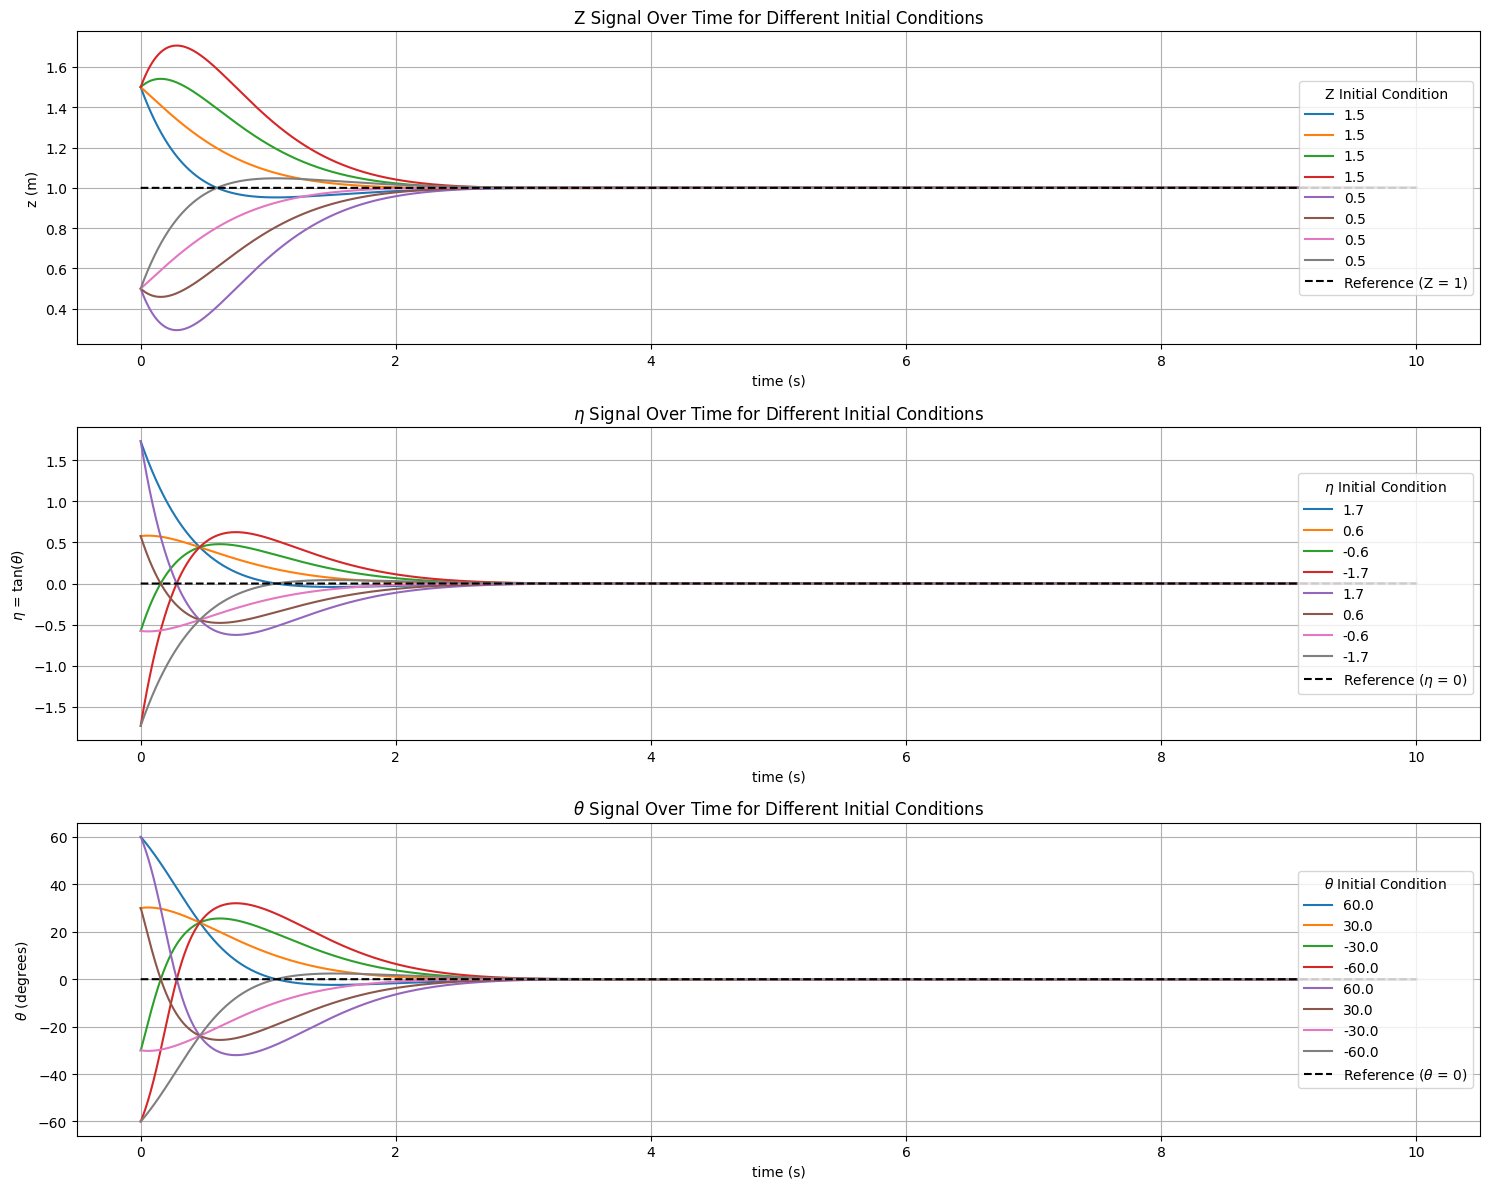

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step function for Euler Method
def step_f(z, eta, zd, vd, K1, K2, dt):
    # Calculate tilde_z
    tilde_z = z - zd
    # Calculate phi
    phi = K1 * tilde_z / vd
    # Calculate tilde_eta
    tilde_eta = eta - phi
    # Calculate derivative of phi
    dot_phi = - (K1 * eta)
    # Calculate control u
    u = (-K2 * tilde_eta + vd * tilde_z + dot_phi )/ (1 + eta**2)
    # Return updated state variables using Euler Method
    return z + (-vd * eta) * dt, eta + (1 + eta**2) * u * dt, np.arctan(eta)

# Function to simulate the system
def simulate_system(vd, K1, K2, zd, dt, t_end, z_initial_conditions, eta_initial_conditions):
    # Create time samples
    t_signal = np.arange(0, t_end, dt)
    zd_signal = zd * np.ones_like(t_signal)
    z_signals = []
    eta_signals = []
    theta_signals = []
    # Iterate over initial conditions
    for z_initial in z_initial_conditions:
        for eta_initial in eta_initial_conditions:
            z_signal = np.zeros_like(t_signal)
            eta_signal = np.zeros_like(t_signal)
            theta_signal = np.zeros_like(t_signal)
            # Initialize state variables
            z_signal[0] = z_initial
            eta_signal[0] = eta_initial
            theta_signal[0] = np.arctan(eta_initial)
            # Iterate over time samples
            for i in range(t_signal.shape[0] - 1):
                # Update state variables using Euler Method
                z_signal[i+1], eta_signal[i+1], theta_signal[i+1]= step_f(z_signal[i], eta_signal[i], zd_signal[i], vd, K1, K2, dt)
            # Append new simulations
            z_signals.append(z_signal)
            eta_signals.append(eta_signal)
            theta_signals.append(theta_signal)
    return t_signal, z_signals, eta_signals, theta_signals, zd_signal

# Function to plot results
def plot_results(t_signal, z_signals, zd_signal, eta_signals, theta_signals):
    # Create a figure
    fig, axs = plt.subplots(3, figsize=(15, 12))
    # Plot z and zd for different initial conditions
    for z_signal in z_signals:
        axs[0].plot(t_signal, z_signal, label=f'{round(z_signal[0],1)}')
    axs[0].plot(t_signal, zd_signal, 'k--', label=f'Reference (Z = {zd})')
    axs[0].set_xlabel("time (s)")
    axs[0].set_ylabel("z (m)")
    axs[0].set_title("Z Signal Over Time for Different Initial Conditions")
    axs[0].grid()
    axs[0].legend(loc='right', title=r'Z Initial Condition')

    # Plot eta for different initial conditions
    for eta_signal in eta_signals:
        axs[1].plot(t_signal, eta_signal, label=f'{round(eta_signal[0],1)}')
    axs[1].plot(t_signal, t_signal*0, 'k--', label=r'Reference ($\eta$ = 0)')
    axs[1].set_xlabel("time (s)")
    axs[1].set_ylabel(r"$\eta$ = tan($\theta$)")
    axs[1].set_title(r"$\eta$ Signal Over Time for Different Initial Conditions")
    axs[1].grid()
    axs[1].legend(loc='right', title=r'$\eta$ Initial Condition')

    # Plot theta for different initial conditions
    for theta_signal in theta_signals:
        axs[2].plot(t_signal, theta_signal * 180 / np.pi, label=f'{round(theta_signal[0] * 180 / np.pi, 1)}')
    axs[2].plot(t_signal, t_signal*0, 'k--', label=r'Reference ($\theta$ = 0)')
    axs[2].set_xlabel("time (s)")
    axs[2].set_ylabel(r"$\theta$ (degrees)")
    axs[2].set_title(r"$\theta$ Signal Over Time for Different Initial Conditions")
    axs[2].grid()
    axs[2].legend(loc='right', title=r'$\theta$ Initial Condition')

    plt.tight_layout()
    plt.show()

# Parameters
dt = 0.001
t_end = 10
vd = 1
zd = 1
K1 = 2
K2 = 2
z_initial_conditions = [1.5, 0.5]  # Initial conditions for z
eta_initial_conditions = [np.tan(np.pi/3),   # Initial conditions for eta
                          np.tan(np.pi/6), 
                          np.tan(-np.pi/6), 
                          np.tan(-np.pi/3)]  

# Simulate and plot
t_signal, z_signals, eta_signals, theta_signals, zd_signal = simulate_system(vd, K1, K2, zd, dt, t_end, z_initial_conditions, eta_initial_conditions)
plot_results(t_signal, z_signals, zd_signal, eta_signals, theta_signals)

**2.3**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the backstepping control law.
Plot the **time-evolution** of the state  for different initial conditions.


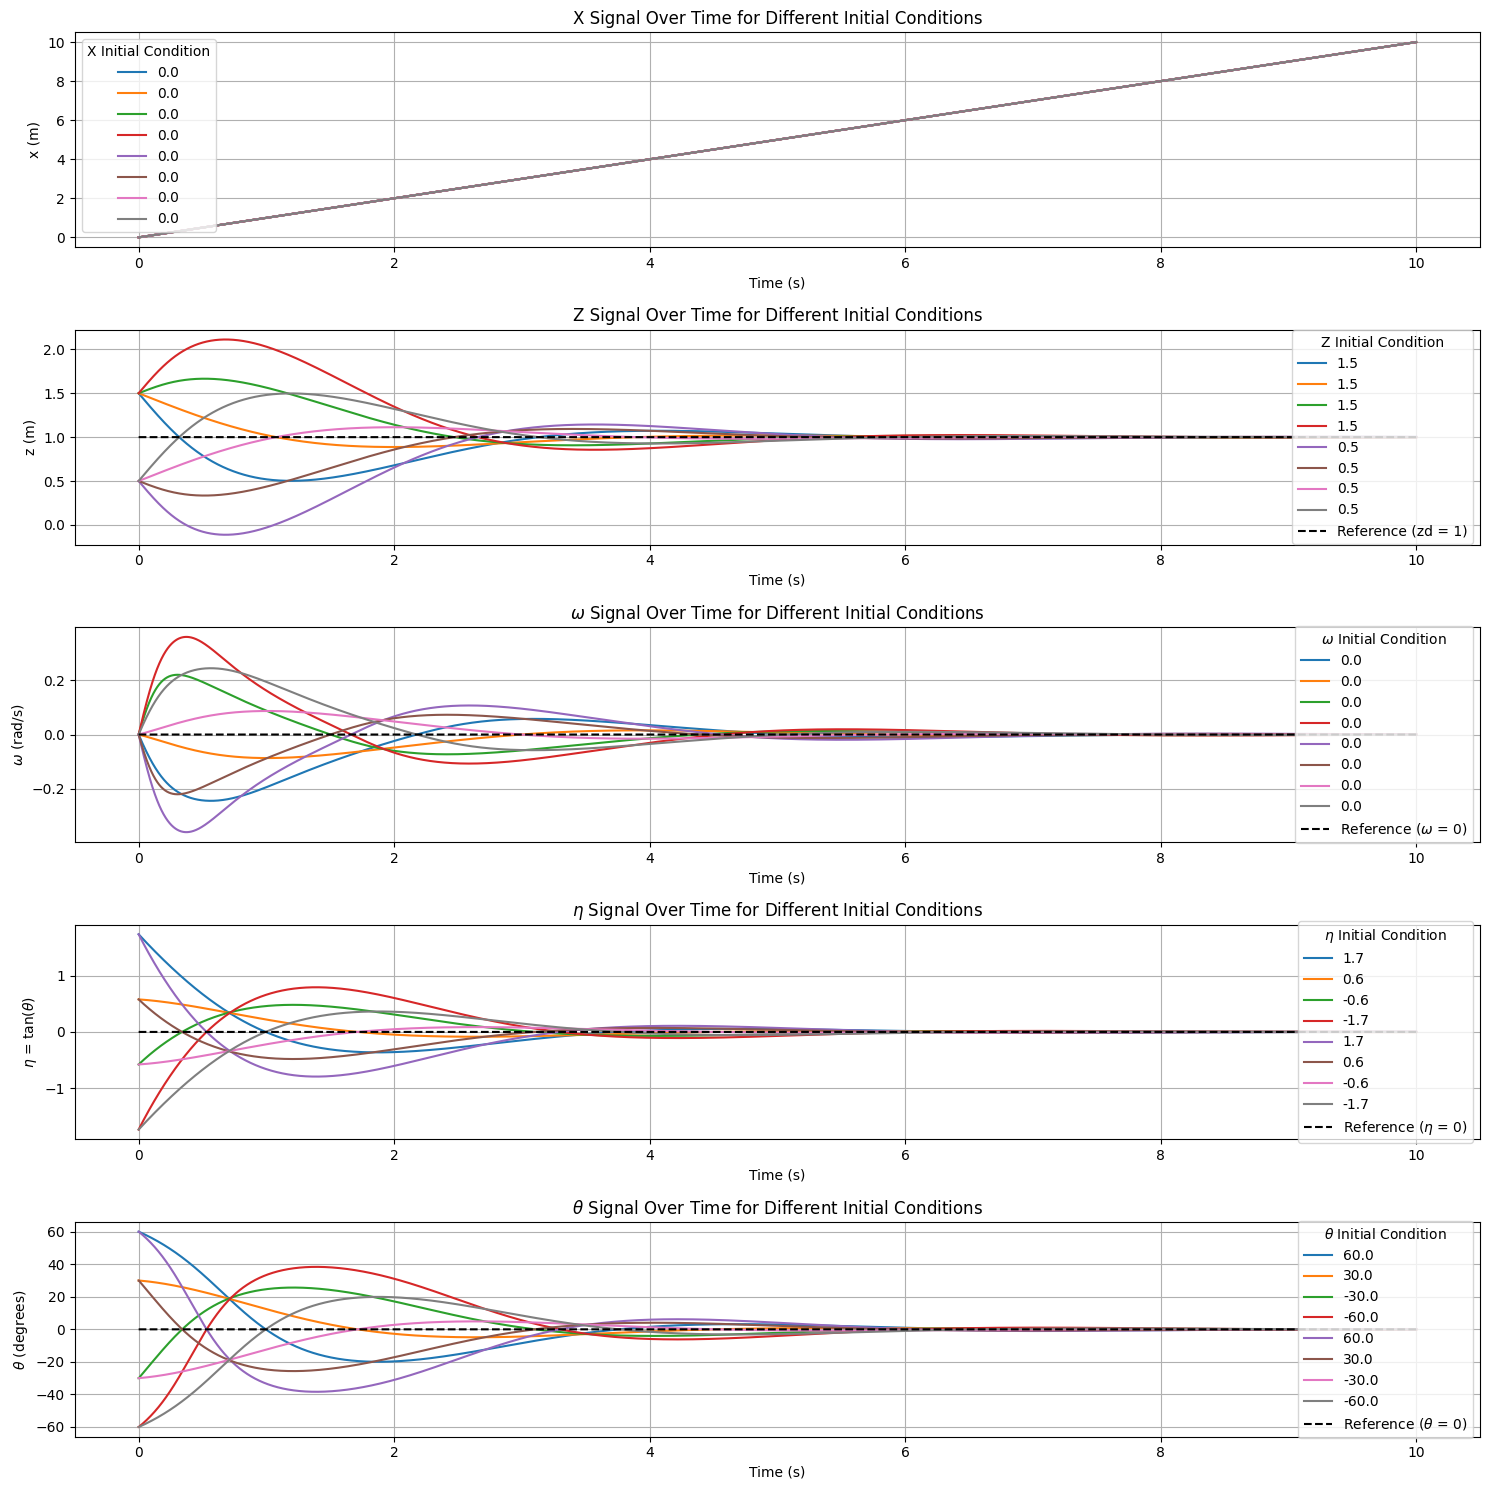

In [183]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step function for Euler Method
def step_f(x, z, w, eta, zd, m, vd, K1, K2, dt):
    d1 = -3
    d2 = -12
    m = 0.9
    # Calculate tilde_z
    tilde_z = z - zd
    # Calculate phi
    phi = K1 * tilde_z / vd
    # Calculate tilde_eta
    tilde_eta = eta - phi
    # Calculate derivative of phi
    dot_phi = - (K1 * eta)
    # Calculate control u
    u = (-K2 * tilde_eta + vd * tilde_z + dot_phi )/ (1 + eta**2)
    # Calculate Theta
    Theta = np.arctan(eta)
    # Return updated state variables using Euler Method
    return x + vd * dt, z + (-vd * np.tan(Theta) + w/np.cos(Theta)) * dt, w + (d1 * w + d2 * w * abs(w) + (m * u) * (vd/np.cos(Theta) - w * np.tan(Theta))) * dt, eta + (1 + eta**2) * u * dt, Theta

# Function to simulate the system
def simulate_system(m, vd, K1, K2, zd, dt, t_end, z_initial_conditions, eta_initial_conditions):
    # Create time samples
    t_signal = np.arange(0, t_end, dt)
    zd_signal = zd * np.ones_like(t_signal)
    x_signals, z_signals, w_signals, eta_signals, theta_signals = [], [], [], [], []

    # Iterate over initial conditions
    for z_initial in z_initial_conditions:
        for eta_initial in eta_initial_conditions:
            x_signal = np.zeros_like(t_signal)
            z_signal = np.zeros_like(t_signal)
            w_signal = np.zeros_like(t_signal)
            eta_signal = np.zeros_like(t_signal)
            theta_signal = np.zeros_like(t_signal)
            # Initialize state variables
            z_signal[0] = z_initial
            eta_signal[0] = eta_initial
            theta_signal[0] = np.arctan(eta_initial)
            # Iterate over time samples
            for i in range(t_signal.shape[0] - 1):
                # Update state variables using Euler Method
                x_signal[i + 1], z_signal[i + 1], w_signal[i + 1], eta_signal[i + 1], theta_signal[i + 1] = step_f(
                    x_signal[i], z_signal[i], w_signal[i], eta_signal[i], zd_signal[i], m, vd, K1, K2, dt)
            # Append new simulations
            x_signals.append(x_signal)
            z_signals.append(z_signal)
            eta_signals.append(eta_signal)
            w_signals.append(w_signal)
            theta_signals.append(theta_signal)
    
    return t_signal, x_signals, z_signals, w_signals, eta_signals, theta_signals, zd_signal

# Function to plot results
def plot_results(t_signal, x_signals, z_signals, zd_signal, w_signals, eta_signals, theta_signals):
    # Create a figure
    fig, axs = plt.subplots(5, figsize=(15, 15))
    
    # Plot z and zd for different initial conditions
    for z_signal in z_signals:
        axs[1].plot(t_signal, z_signal, label=f'{round(z_signal[0],1)}')
    axs[1].plot(t_signal, zd_signal, 'k--', label=f'Reference (zd = {zd})')
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("z (m)")
    axs[1].set_title("Z Signal Over Time for Different Initial Conditions")
    axs[1].legend(loc='right', title=r'Z Initial Condition')
    axs[1].grid()

    # Plot eta for different initial conditions
    for eta_signal in eta_signals:
        axs[3].plot(t_signal, eta_signal, label=f'{round(eta_signal[0],1)}')
    axs[3].plot(t_signal, np.zeros_like(t_signal), 'k--', label=r'Reference ($\eta$ = 0)')
    axs[3].set_xlabel("Time (s)")
    axs[3].set_ylabel(r"$\eta$ = tan($\theta$)")
    axs[3].set_title(r"$\eta$ Signal Over Time for Different Initial Conditions")
    axs[3].legend(loc='right', title=r'$\eta$ Initial Condition')
    axs[3].grid()

    # Plot theta for different initial conditions
    for theta_signal in theta_signals:
        axs[4].plot(t_signal, theta_signal * 180 / np.pi, label=f'{round(theta_signal[0] * 180 /np.pi, 1)}')
    axs[4].plot(t_signal, np.zeros_like(t_signal), 'k--', label=r'Reference ($\theta$ = 0)')
    axs[4].set_xlabel("Time (s)")
    axs[4].set_ylabel(r"$\theta$ (degrees)")
    axs[4].set_title(r"$\theta$ Signal Over Time for Different Initial Conditions")
    axs[4].legend(loc='right', title=r'$\theta$ Initial Condition')
    axs[4].grid()

    # Plot x for different initial conditions
    for x_signal in x_signals:
        axs[0].plot(t_signal, x_signal, label=f'{round(x_signal[0], 1)}')
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("x (m)")
    axs[0].set_title("X Signal Over Time for Different Initial Conditions")
    axs[0].legend(loc='best', title=r'X Initial Condition')
    axs[0].grid()

    # Plot w for different initial conditions
    for w_signal in w_signals:
        axs[2].plot(t_signal, w_signal, label=f'{round(w_signal[0], 1)}')
    axs[2].plot(t_signal, np.zeros_like(t_signal), 'k--', label=r'Reference ($\omega$ = 0)')
    axs[2].set_xlabel("Time (s)")
    axs[2].set_ylabel(r"$\omega$ (rad/s)")
    axs[2].set_title(r"$\omega$ Signal Over Time for Different Initial Conditions")
    axs[2].legend(loc='right', title=r'$\omega$ Initial Condition')
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Parameters
dt = 0.001
t_end = 10
vd = 1
m = 0.9
zd = 1
K1 = 1
K2 = 1
z_initial_conditions = [1.5, 0.5]  # Initial conditions for z
eta_initial_conditions = [np.tan(np.pi/3),   # Initial conditions for eta
                          np.tan(np.pi/6), 
                          np.tan(-np.pi/6), 
                          np.tan(-np.pi/3)]  

# Simulate and plot
t_signal, x_signals, z_signals, w_signals, eta_signals, theta_signals, zd_signal = simulate_system(m, vd, K1, K2, zd, dt, t_end, z_initial_conditions, eta_initial_conditions)
plot_results(t_signal, x_signals, z_signals, zd_signal, w_signals, eta_signals, theta_signals)

**2.4**
For the same conditions stated in **2.1**, design a **sliding mode controller** and confirm the results through simulation.
For the sliding surface use
$$
s = \dot{\tilde z} + \lambda \tilde z, \quad \lambda>0
$$




Sliding mode demonstration:

$$
 \begin{cases}
ż = -v_dtan(θ)  \\
\ddot{z}= -v_d \frac{d}{dt}(tan(θ)) = - \frac{vdθ̇ }{cos^2(θ)} \\
θ̇ = q \\
\end{cases}
$$

Having:
$$
\tilde z=z-z_d \\
$$
And:
$$
\dot{\tilde z}=\dot{z} - \dot{z_d}= \dot{ z} \\
\ddot{\tilde z}=\ddot{z}-\ddot{z_d}=\ddot{z}

$$

Using the Sliding surface we get: 
$$

\ddot{ s}=\ddot{\tilde z}+\lambda\dot{\tilde z}= \ddot{z}+\lambda \dot{z}
$$

And choosing the following V(s):

$$
V(s)=\frac{1}{2} s^2
$$

Then we get: 
$$
\dot{V}=s\dot{s}= s(\ddot{z}+\lambda\dot{ z})= s(-\frac{vd q}{cos^2(θ)}- \lambda vdtan(θ))

\\ ⟺ q=-\frac{cos^2(θ)}{vd} (\lambda vd tan(θ)+ \mu 1)
$$

where: 
$$
\mu 1= -ksat(s/\epsilon)
$$




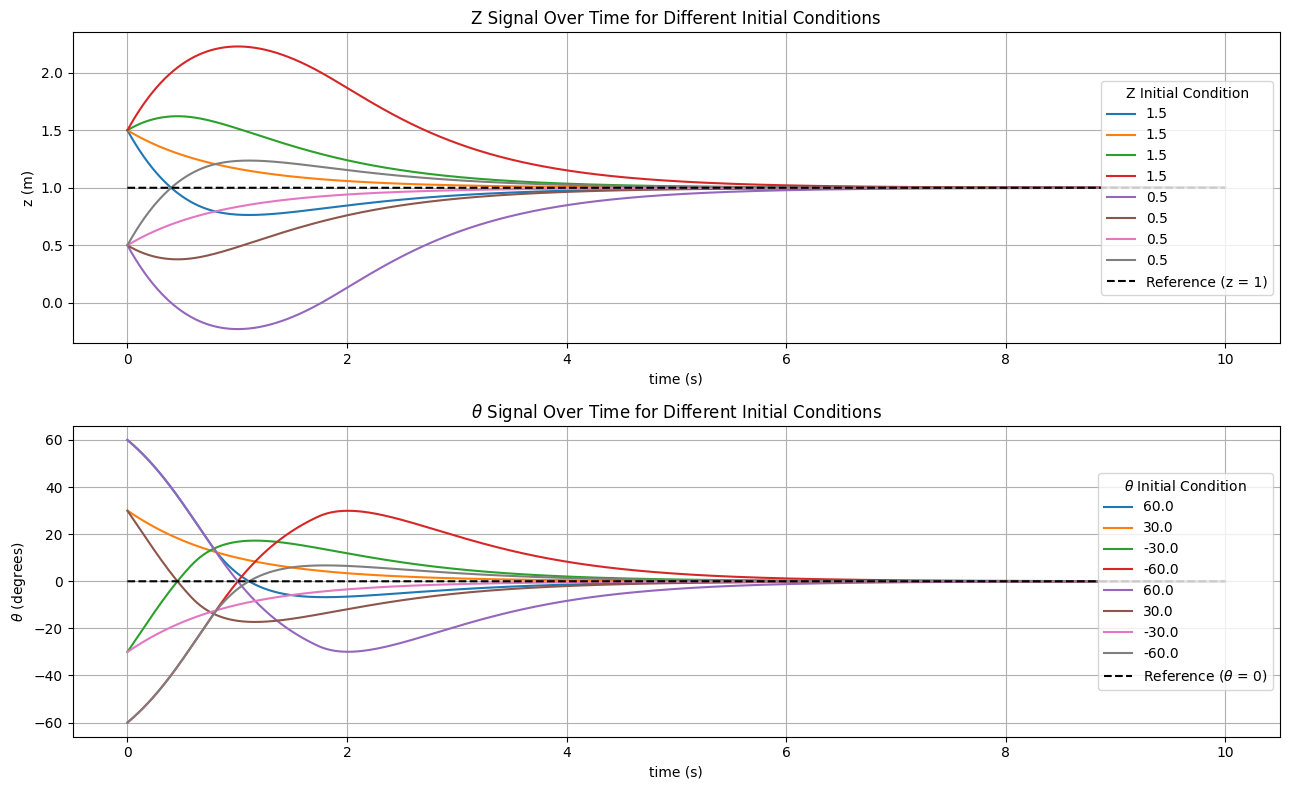

In [184]:
import numpy as np
import matplotlib.pyplot as plt


# Define the step function for Euler Method
def step_f(z, theta, zd, vd, LAMBDA, K, dt):
    epsilon = 0.5
    # Calculate tilde_z
    tilde_z = z - zd
    # Calculate tilde_z first derivative
    tilde_z_dev = - vd * np.tan(theta) - 0
    # Calculate Sliding Surface
    s = tilde_z_dev + LAMBDA * tilde_z
    # Calculate u1 Switching Control
    if abs(s) < epsilon:
        u1 = -K * s / epsilon
    else:
        u1 = -K * np.sign(s / epsilon)
    # Calculate control u
    u = -(np.cos(theta) ** 2 / vd) * (LAMBDA * vd * np.tan(theta) + u1)
    # Return updated state variables using Euler Method
    return z + (-vd * np.tan(theta)) * dt, theta + u * dt

# Function to simulate the system
def simulate_system(vd, LAMBDA, k, zd, dt, t_end, z_initial_conditions, theta_initial_conditions):
    # Create time samples
    t_signal = np.arange(0, t_end, dt)
    zd_signal = zd * np.ones_like(t_signal)
    z_signals = []
    theta_signals = []
    # Iterate over initial conditions
    for z_initial in z_initial_conditions:
        for theta_initial in theta_initial_conditions:
            z_signal = np.zeros_like(t_signal)
            theta_signal = np.zeros_like(t_signal)
            # Initialize state variables
            z_signal[0] = z_initial
            theta_signal[0] = theta_initial
            # Iterate over time samples
            for i in range(t_signal.shape[0] - 1):
                # Update state variables using Euler Method
                z_signal[i + 1], theta_signal[i + 1] = step_f(z_signal[i], theta_signal[i], zd_signal[i], vd, LAMBDA, k, dt)
            # Append new simulations
            z_signals.append(z_signal)
            theta_signals.append(theta_signal)
    return t_signal, z_signals, theta_signals, zd_signal

# Function to plot results
def plot_results(t_signal, z_signals, zd_signal, theta_signals):
    # Create a figure
    fig, axs = plt.subplots(2, figsize=(13, 8))
    # Plot z and zd for different initial conditions
    for z_signal in z_signals:
        axs[0].plot(t_signal, z_signal, label=f'{z_signal[0]}' )
    axs[0].plot(t_signal, zd_signal, 'k--', label=f"Reference (z = {zd})")
    axs[0].set_xlabel("time (s)")
    axs[0].set_ylabel("z (m)")
    axs[0].set_title("Z Signal Over Time for Different Initial Conditions")
    axs[0].grid()
    axs[0].legend(loc='right', title=r'Z Initial Condition')

    # Plot theta for different initial conditions
    for theta_signal in theta_signals:
        axs[1].plot(t_signal, theta_signal * 180 / np.pi, label=f'{round(theta_signal[0] * 180 /np.pi, 1)}')
    axs[1].plot(t_signal, t_signal * 0, 'k--', label=r"Reference ($\theta$ = 0)")
    axs[1].set_xlabel("time (s)")
    axs[1].set_ylabel(r"$\theta$ (degrees)")
    axs[1].set_title(r"$\theta$ Signal Over Time for Different Initial Conditions")
    axs[1].grid()
    axs[1].legend(loc='right', title=r'$\theta$ Initial Condition')

    plt.tight_layout()
    plt.show()

# Parameters
dt = 0.001
t_end = 10
vd = 1
zd = 1
LAMBDA = 1
K = 1
z_initial_conditions = [1.5, 0.5]  # Initial conditions for z
theta_initial_conditions = [np.pi / 3, 
                            np.pi / 6, 
                            -np.pi / 6, 
                            -np.pi / 3]  # Initial conditions for theta

# Simulate and plot
t_signal, z_signals, theta_signals, zd_signal = simulate_system(vd, LAMBDA, K, zd, dt, t_end, z_initial_conditions, theta_initial_conditions)
plot_results(t_signal, z_signals, zd_signal, theta_signals)

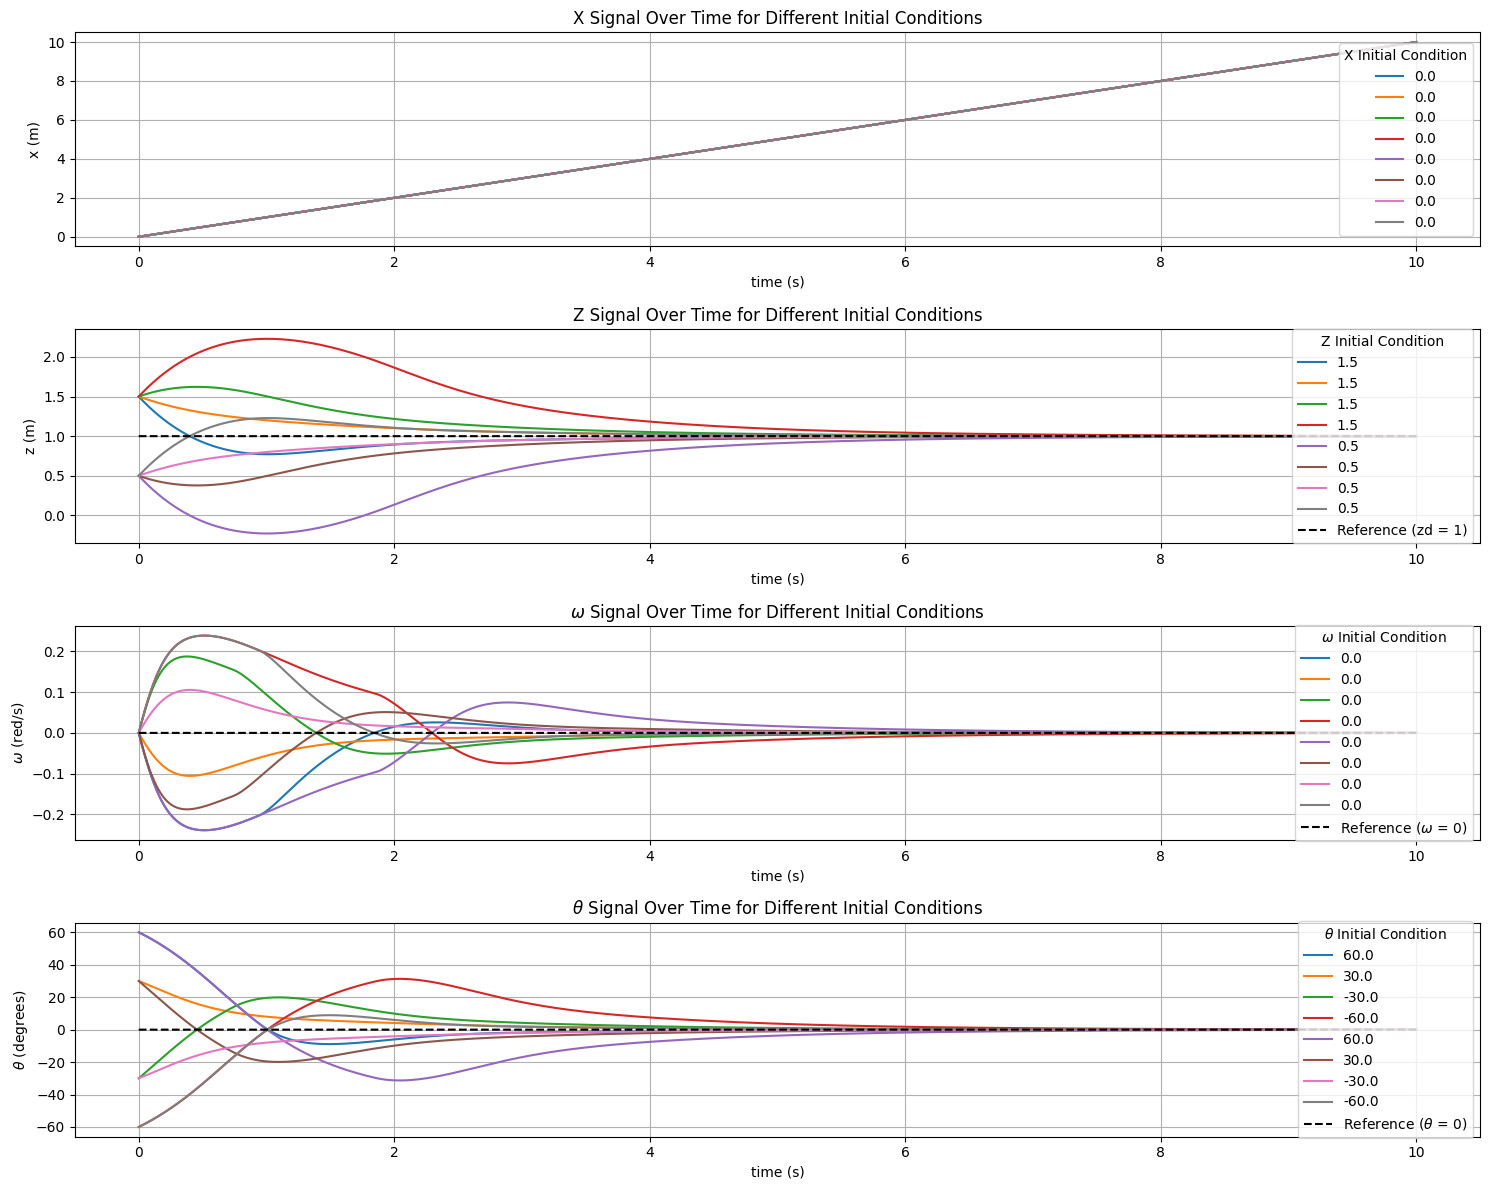

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step function for Euler Method
def step_f(x, z, w, theta, zd, vd, LAMBDA, K, dt):
    d1 = -3
    d2 = -12
    m = 0.9
    epsilon = 0.5
    # Calculate tilde_z
    tilde_z = z - zd
    # Calculate tilde_z first derivative
    tilde_z_dev = -vd * np.tan(theta) + w/np.cos(theta)
    # Calculate Sliding Surface
    s = tilde_z_dev + LAMBDA * tilde_z
    # Calculate u1 Switching Control
    if abs(s) < epsilon:
        u1 = -K * s / epsilon
    else:
        u1 = -K * np.sign(s / epsilon)
    # Calculate control u
    u = -(np.cos(theta) ** 2 / vd) * (LAMBDA * vd * np.tan(theta) + u1)
    # Return updated state variables using Euler Method
    x_new = x + vd * dt
    z_new = z + (-vd * np.tan(theta)) * dt
    w_new = w + (d1 * w + d2 * w * abs(w) + (m * u) * (vd/np.cos(theta) - w * np.tan(theta))) * dt
    theta_new = theta + u * dt
    return x_new, z_new, w_new, theta_new

# Function to simulate the system
def simulate_system(vd, LAMBDA, K, zd, dt, t_end, z_initial_conditions, theta_initial_conditions):
    # Create time samples
    t_signal = np.arange(0, t_end, dt)
    zd_signal = zd * np.ones_like(t_signal)
    x_signals = []
    z_signals = []
    w_signals = []
    theta_signals = []
    # Iterate over initial conditions
    for z_initial in z_initial_conditions:
        for theta_initial in theta_initial_conditions:
            x_signal = np.zeros_like(t_signal)
            z_signal = np.zeros_like(t_signal)
            w_signal = np.zeros_like(t_signal)
            theta_signal = np.zeros_like(t_signal)
            # Initialize state variables
            x_signal[0] = 0  # Assume x initial condition as 1
            z_signal[0] = z_initial
            w_signal[0] = 0  # Assume w initial condition as 1
            theta_signal[0] = theta_initial
            # Iterate over time samples
            for i in range(t_signal.shape[0] - 1):
                # Update state variables using Euler Method
                x_signal[i + 1], z_signal[i + 1], w_signal[i + 1], theta_signal[i + 1] = step_f(
                    x_signal[i], z_signal[i], w_signal[i], theta_signal[i], zd_signal[i], vd, LAMBDA, K, dt
                )
            # Append new simulations
            x_signals.append(x_signal)
            z_signals.append(z_signal)
            w_signals.append(w_signal)
            theta_signals.append(theta_signal)
    return t_signal, x_signals, z_signals, w_signals, theta_signals, zd_signal

# Function to plot results
def plot_results(t_signal, x_signals, z_signals, zd_signal, w_signals, theta_signals):
    # Create a figure
    fig, axs = plt.subplots(4, figsize=(15, 12))

    # Plot x for different initial conditions
    for x_signal in x_signals:
        axs[0].plot(t_signal, x_signal, label=f'{x_signal[0]}')
    axs[0].set_xlabel("time (s)")
    axs[0].set_ylabel("x (m)")
    axs[0].set_title("X Signal Over Time for Different Initial Conditions")
    axs[0].grid()
    axs[0].legend(loc='right', title=r'X Initial Condition')

    # Plot z and zd for different initial conditions
    for z_signal in z_signals:
        axs[1].plot(t_signal, z_signal, label=f'{z_signal[0]}')
    axs[1].plot(t_signal, zd_signal, 'k--', label=f"Reference (zd = {zd})")
    axs[1].set_xlabel("time (s)")
    axs[1].set_ylabel("z (m)")
    axs[1].set_title("Z Signal Over Time for Different Initial Conditions")
    axs[1].grid()
    axs[1].legend(loc='right', title=r'Z Initial Condition')

    # Plot w for different initial conditions
    for w_signal in w_signals:
        axs[2].plot(t_signal, w_signal, label=f'{w_signal[0]}')
    axs[2].plot(t_signal, t_signal * 0, 'k--', label=r"Reference ($\omega$ = 0)")
    axs[2].set_xlabel("time (s)")
    axs[2].set_ylabel(r"$\omega$ (red/s)")
    axs[2].set_title(r"$\omega$ Signal Over Time for Different Initial Conditions")
    axs[2].grid()
    axs[2].legend(loc='right', title=r'$\omega$ Initial Condition')

    # Plot theta for different initial conditions
    for theta_signal in theta_signals:
        axs[3].plot(t_signal, theta_signal * 180 / np.pi, label=f'{round(theta_signal[0] * 180 /np.pi, 1)}')
    axs[3].plot(t_signal, t_signal * 0, 'k--', label=r"Reference ($\theta$ = 0)")
    axs[3].set_xlabel("time (s)")
    axs[3].set_ylabel(r"$\theta$ (degrees)")
    axs[3].set_title(r"$\theta$ Signal Over Time for Different Initial Conditions")
    axs[3].grid()
    axs[3].legend(loc='right', title=r'$\theta$ Initial Condition')

    plt.tight_layout()
    plt.show()

# Parameters
dt = 0.001
t_end = 10
vd = 1
zd = 1
LAMBDA = 1
K = 1
z_initial_conditions = [1.5, 0.5]  # Initial conditions for z
theta_initial_conditions = [np.pi / 3, np.pi / 6, -np.pi / 6, -np.pi / 3]  # Initial conditions for theta

# Simulate and plot
t_signal, x_signals, z_signals, w_signals, theta_signals, zd_signal = simulate_system(vd, LAMBDA, K, zd, dt, t_end, z_initial_conditions, theta_initial_conditions)
plot_results(t_signal, x_signals, z_signals, zd_signal, w_signals, theta_signals)

**2.5 (Extra)**
For the linearized system in **1.2**, design a **LQR controller** and confirm the results through simulation.



**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

The linearized system is given by:

$$
\dot{X} = AX + BX
$$

Where:

$$ 
A = \begin{bmatrix}
0 & 1 & -v_d \\
0 & d_1 & 0 \\
0 & 0 & 0 \\
\end{bmatrix} 
$$

$$ 
B = \begin{bmatrix}
0 \\
\tilde mv_d \\
1 \\
\end{bmatrix}
$$

$$ 
X = \begin{bmatrix}
\tilde z \\
\omega \\
\theta \\
\end{bmatrix}
$$

First, we need to choose the \( Q \) and \( R \) matrices.

For \( Q \), we have:

$$ 
Q = \begin{bmatrix}
q_1 & 0 & 0 \\
0 & q_2 & 0 \\
0 & 0 & q_3 \\
\end{bmatrix}
$$

By choosing appropriate values in the diagonal based on the importance of each state variable in our control objective. Higher values indicate a higher cost for deviations in that state.

For \( R \), it's a single scalar since it's a one-dimensional input system:

$$ 
R = r
$$

Similarly, by choosing an appropriate value for \( r \) based on the desired control effort. A higher value will penalize larger control inputs more heavily.

Now, we need to solve the Continuous Algebraic Riccati Equation to find the optimal gain matrix \( K \):

$$ 
A^T P + P A - P B R^{-1} B^T P + Q = 0 
$$

where:
- \( A \) is the system matrix,
- \( B \) is the input matrix,
- \( Q \) is the state cost matrix,
- \( R \) is the control cost matrix, and
- \( P \) is the solution matrix.


The optimal gain matrix \( K \) is then given by:

$$ 
K = R^{-1} B^T P 
$$

Finally, we can use the control law \( u = -Kx \) in our control system to stabilize the linearized system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_continuous_are, inv

# Define the closed-loop step function using Euler Method
def step_f_lqr(x, A_cl, dt):
    return x + np.dot(A_cl, x) * dt

# Function to simulate the closed-loop system
def simulate_system_lqr(A_cl, dt, t_end, x_initial_conditions):
    t_signal = np.arange(0, t_end, dt)
    x_signals = []
    
    for x_initial in x_initial_conditions:
        x_signal = np.zeros((len(t_signal), len(x_initial)))
        x_signal[0] = x_initial
        
        for i in range(len(t_signal) - 1):
            x_signal[i+1] = step_f_lqr(x_signal[i], A_cl, dt)
        
        x_signals.append(x_signal)
    
    return t_signal, x_signals

# Function to plot results with specific state names
def plot_results(t_signal, x_signals):
    # Define state names
    state_names = ['z (m)', r'$\omega$ (rad/s)', r'$\theta$ (degrees)']
    names = ['Z', r'$\omega$', r'$\theta$']
    
    # Create a figure
    fig, axs = plt.subplots(3, figsize=(15, 10))
    
    # Plot each state
    for idx, state_name in enumerate(state_names):
        for x_signal in x_signals:
            if idx == 2:  # Convert theta (state 3) from radians to degrees
                axs[idx].plot(t_signal, (x_signal[:, idx]) * 180 / np.pi, label=f'{round(x_signal[:, idx][0] * 180 /np.pi, 1)}')
            else:
                axs[idx].plot(t_signal, x_signal[:, idx], label=f'{x_signal[:, idx][0]}')
        axs[idx].plot(t_signal, t_signal*0, 'k--', label=f'Reference ({names[idx]} = 0)')
        axs[idx].set_xlabel("time (s)")
        axs[idx].set_ylabel(state_name)
        axs[idx].set_title(f"{names[idx]} Over Time for Different Initial Conditions")
        axs[idx].legend(loc='right', title=f'{names[idx]} Initial Condition')
        axs[idx].grid()
    
    plt.tight_layout()  
    plt.show()

In [9]:
# System parameters
vd = 1
d1 = -3
m = 0.9
zd = 0

# Define system matrices
A = np.array([[0, 1, -vd],
              [0, d1, 0],
              [0, 0, 0]])

B = np.array([[0],
              [m * vd],
              [1]])

# Define weighting matrices
Q = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]]) * 0.01

R = np.array([[1]]) * 0.01

# Solve Riccati equation to get P
P = solve_continuous_are(A, B, Q, R)

# Compute the LQR gain matrix K
K = np.dot(inv(R), np.dot(B.T, P))

print("Gain matrix K:")
print(K)

Gain matrix K:
[[-1.         -0.23303826  2.01760794]]


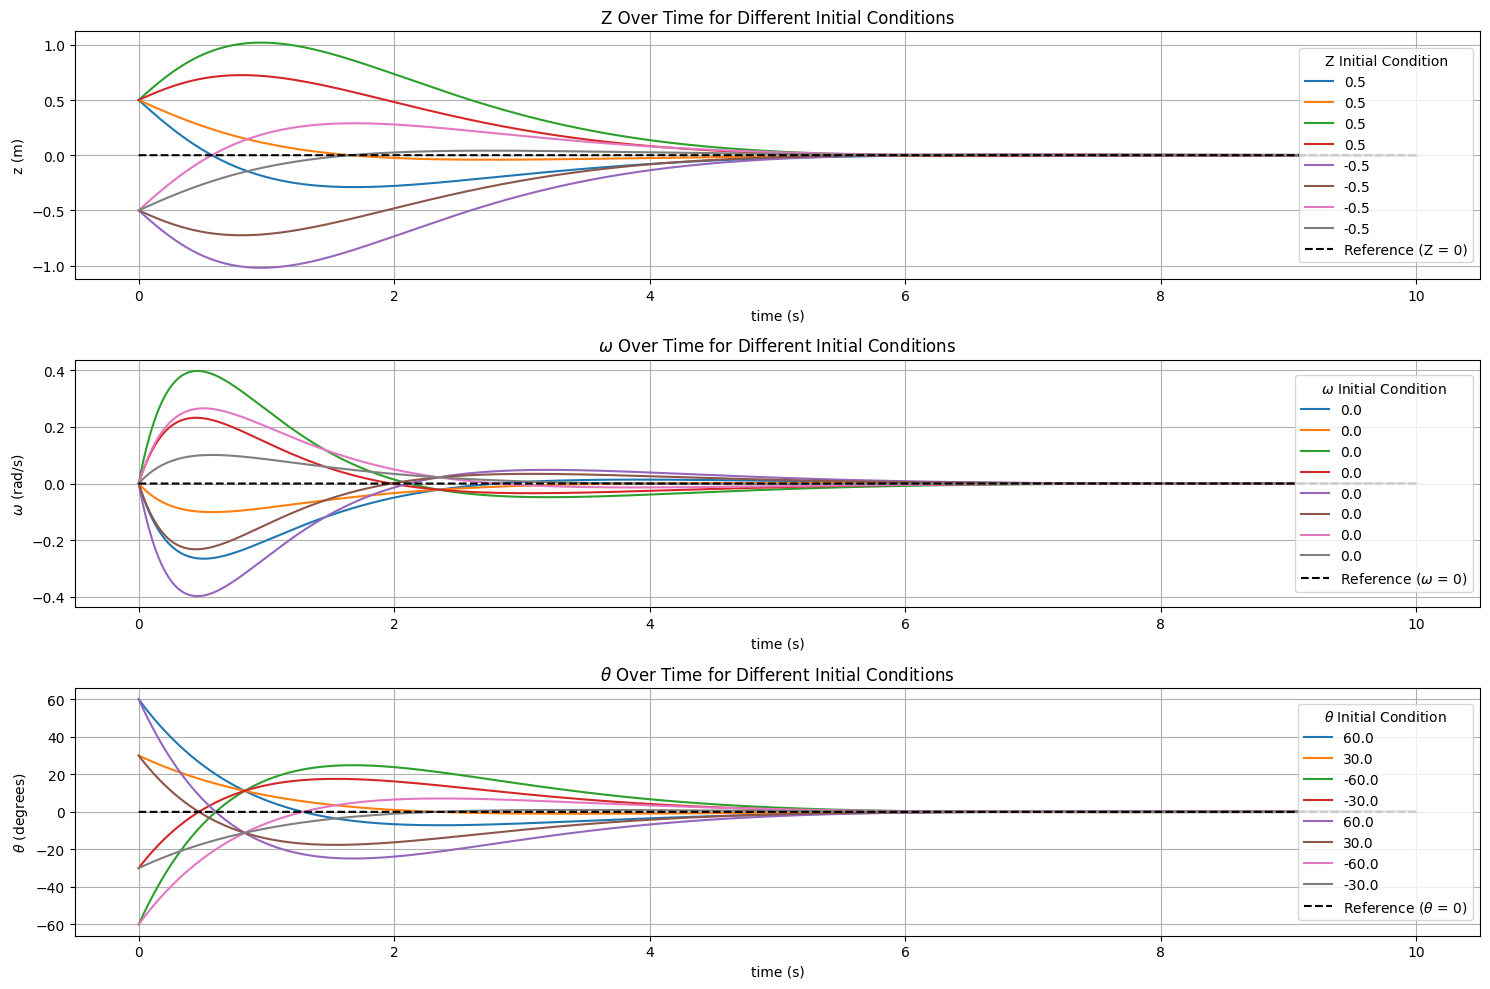

In [10]:
# Compute closed-loop system matrix A_cl
A_cl = A - np.dot(B, K)

# Parameters for simulation
dt = 0.001
t_end = 10
x_initial_conditions = [
    np.array([0.5, 0.0, np.pi/3]),
    np.array([0.5, 0.0, np.pi/6]),
    np.array([0.5, 0.0, -np.pi/3]),
    np.array([0.5, 0.0, -np.pi/6]),
    np.array([-0.5, 0.0, np.pi/3]),
    np.array([-0.5, 0.0, np.pi/6]),
    np.array([-0.5, 0.0, -np.pi/3]),
    np.array([-0.5, 0.0, -np.pi/6]),
]

# Simulate and plot
t_signal, x_signals = simulate_system_lqr(A_cl, dt, t_end, x_initial_conditions)
plot_results(t_signal, x_signals)